In [1]:
from keras.datasets import cifar10
import tensorflow as tf

Using TensorFlow backend.


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs available : ", len(physical_devices))

Number of GPUs available :  0


In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<Figure size 1440x1440 with 0 Axes>

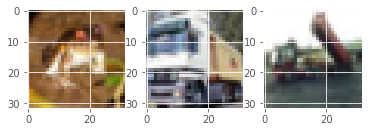

In [7]:
plt.figure(figsize=(20,20))

fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(x_train[0])

ax2.imshow(x_train[1])

ax3.imshow(x_train[2])

In [8]:
## Typecasting of data

In [9]:
import numpy as np

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
## normalize data

In [12]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
## encode output

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
from keras.utils import np_utils

In [18]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential([
                    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape= (32, 32, 3)),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dense(128, activation ='relu'),
                    Dense(10, activation = 'softmax'),
])


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, validation_split=0.2, epochs = 15, verbose = 2, batch_size=250, )

Epoch 1/15
160/160 - 28s - loss: 0.8743 - accuracy: 0.6995 - val_loss: 1.0256 - val_accuracy: 0.6450
Epoch 2/15
160/160 - 28s - loss: 0.8289 - accuracy: 0.7145 - val_loss: 1.0547 - val_accuracy: 0.6343
Epoch 3/15
160/160 - 28s - loss: 0.8082 - accuracy: 0.7216 - val_loss: 1.0549 - val_accuracy: 0.6376
Epoch 4/15
160/160 - 28s - loss: 0.7726 - accuracy: 0.7327 - val_loss: 1.0132 - val_accuracy: 0.6541
Epoch 5/15
160/160 - 28s - loss: 0.7525 - accuracy: 0.7398 - val_loss: 1.0146 - val_accuracy: 0.6526
Epoch 6/15
160/160 - 28s - loss: 0.7299 - accuracy: 0.7489 - val_loss: 1.0028 - val_accuracy: 0.6561
Epoch 7/15
160/160 - 28s - loss: 0.6952 - accuracy: 0.7624 - val_loss: 1.0670 - val_accuracy: 0.6386
Epoch 8/15
160/160 - 28s - loss: 0.6731 - accuracy: 0.7696 - val_loss: 1.0279 - val_accuracy: 0.6571
Epoch 9/15
160/160 - 27s - loss: 0.6489 - accuracy: 0.7795 - val_loss: 1.0425 - val_accuracy: 0.6536
Epoch 10/15
160/160 - 27s - loss: 0.6237 - accuracy: 0.7874 - val_loss: 1.0272 - val_accura

In [29]:
"""prediction accuracy is much higher than validation accuracy which means the model is overfitting
   solution: add dropout layer 
  predictive accuracy is not as high as well
  solution: add more layers
  """

In [31]:
model2 = Sequential([
                    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape= (32, 32, 3)),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),

                    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),

                    Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),

                    Flatten(),
                    Dense(128, activation ='relu'),
                    Dense(356, activation ='relu'),
                    Dense(10, activation = 'softmax'),
])


In [33]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

In [35]:
model2.fit(x_train, y_train, validation_split=0.2, epochs = 25, verbose = 2, batch_size=250, )

Epoch 1/25
160/160 - 88s - loss: 1.7997 - accuracy: 0.3370 - val_loss: 1.5286 - val_accuracy: 0.4528
Epoch 2/25
160/160 - 85s - loss: 1.4452 - accuracy: 0.4742 - val_loss: 1.3054 - val_accuracy: 0.5338
Epoch 3/25
160/160 - 85s - loss: 1.2711 - accuracy: 0.5414 - val_loss: 1.1713 - val_accuracy: 0.5840
Epoch 4/25
160/160 - 85s - loss: 1.1548 - accuracy: 0.5842 - val_loss: 1.0757 - val_accuracy: 0.6256
Epoch 5/25
160/160 - 85s - loss: 1.0632 - accuracy: 0.6209 - val_loss: 1.0111 - val_accuracy: 0.6485
Epoch 6/25
160/160 - 85s - loss: 0.9944 - accuracy: 0.6470 - val_loss: 0.9576 - val_accuracy: 0.6671
Epoch 7/25
160/160 - 85s - loss: 0.9297 - accuracy: 0.6706 - val_loss: 0.9374 - val_accuracy: 0.6778
Epoch 8/25
160/160 - 84s - loss: 0.8822 - accuracy: 0.6852 - val_loss: 0.8530 - val_accuracy: 0.7012
Epoch 9/25
160/160 - 84s - loss: 0.8423 - accuracy: 0.7006 - val_loss: 0.8191 - val_accuracy: 0.7129
Epoch 10/25
160/160 - 84s - loss: 0.8068 - accuracy: 0.7151 - val_loss: 0.8076 - val_accura

In [36]:
## new model is only slightly better than the previous model. pretrained models could be used for better accuracy

In [56]:
model2_predictions = model2.predict(x_test)

In [57]:
model2_predictions = np.argmax(model2_predictions, axis = 1)

In [63]:
y_test = np.argmax(y_test, axis =1)

In [58]:
model2_predictions

array([3, 8, 8, ..., 5, 1, 7])

In [64]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
confusion_matrix(model2_predictions, y_test)

array([[785,  16,  58,  20,  13,  10,   5,  11,  41,  24],
       [ 14, 870,   4,  11,   4,   2,   4,   0,  20,  70],
       [ 45,   4, 697,  94,  69,  76,  44,  39,  15,   5],
       [ 10,   6,  45, 581,  52, 194,  64,  36,   7,  15],
       [ 13,   1,  78,  61, 748,  48,  37,  65,   6,   3],
       [  4,   1,  27, 132,  17, 595,  14,  31,   2,   6],
       [  8,   6,  41,  45,  42,  18, 816,   6,   3,   5],
       [ 12,   2,  24,  28,  46,  40,   4, 791,   1,   7],
       [ 76,  22,  20,  11,   9,  11,   9,   5, 886,  27],
       [ 33,  72,   6,  17,   0,   6,   3,  16,  19, 838]])

In [69]:
print(classification_report(model2_predictions, y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       983
           1       0.87      0.87      0.87       999
           2       0.70      0.64      0.67      1088
           3       0.58      0.58      0.58      1010
           4       0.75      0.71      0.73      1060
           5       0.59      0.72      0.65       829
           6       0.82      0.82      0.82       990
           7       0.79      0.83      0.81       955
           8       0.89      0.82      0.85      1076
           9       0.84      0.83      0.83      1010

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

